In [2]:
import swyft

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [4]:
def background(x, a=-2, b=3):
    return a*x + b

def alp_spec(x, g=1, m=1):
    return np.sin(g*x + m)

def noise(x,sig=1):
    return sig*np.random.randn(len(x))


In [5]:
x = np.arange(1,10,0.2)
y = background(x) + alp_spec(x, g=1, m=1) + noise(x)

In [6]:
def model(v):
    y = background(x) + alp_spec(x, g=v[0], m=[1])
    return dict(y=y)

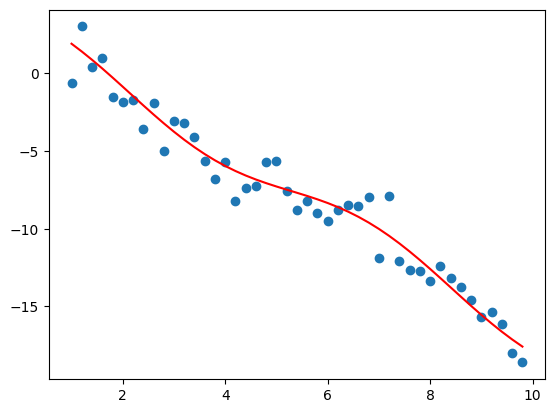

In [7]:
plt.figure()
plt.scatter(x, y)
plt.plot(x,model([1,1])['y'], color="r")
plt.show()

In [100]:
sim = swyft.Simulator(model, ['g', 'm'], dict(y=(len(x),)))

store = swyft.MemoryStore(sim)

Creating new store.


In [144]:
prior = swyft.Prior(lambda u: u*np.array([4,16])-np.array([2,8]), 2)
store.add(300000, prior)
store.simulate()

Store: Adding 270008 new samples to simulator store.


In [145]:
def noise2(sim, v):
    d = sim['y'] + np.random.randn(len(x))*1
    return dict(d=d)

In [146]:
dataset = swyft.Dataset(300000, prior, store, simhook = noise2)

In [147]:
post = swyft.Posteriors(dataset)

In [148]:
%%time
marginals = [(0,1)]
post.add(marginals, device='cpu')
post.train(marginals)

Training: lr=0.001, Epoch=30, VL=0.2905
CPU times: user 5h 28min 9s, sys: 1h 22min 51s, total: 6h 51min 1s
Wall time: 1h 44min 37s


In [149]:
%%time
obs = dict(d=y)
samples = post.sample(1000000, obs)

CPU times: user 1min 36s, sys: 604 ms, total: 1min 36s
Wall time: 24.6 s


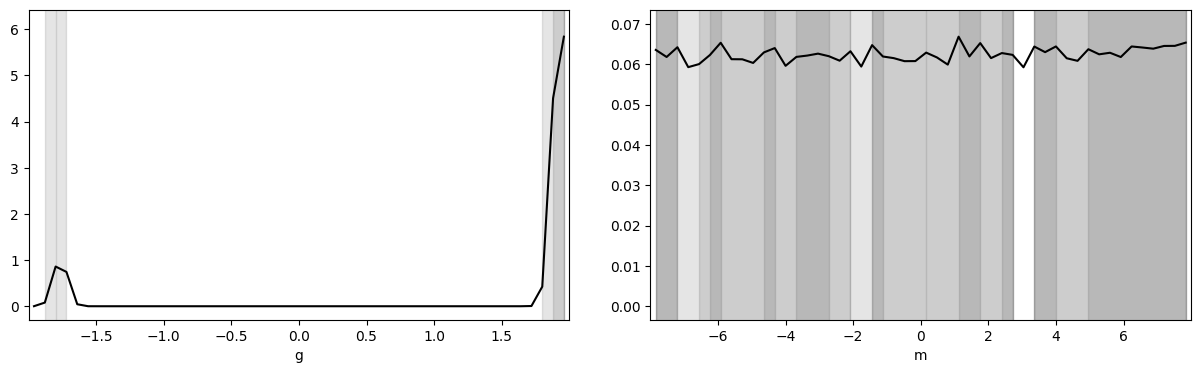

In [150]:
swyft.plot_1d(samples, [0, 1], bins = 50, figsize=(15,4))
plt.show()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


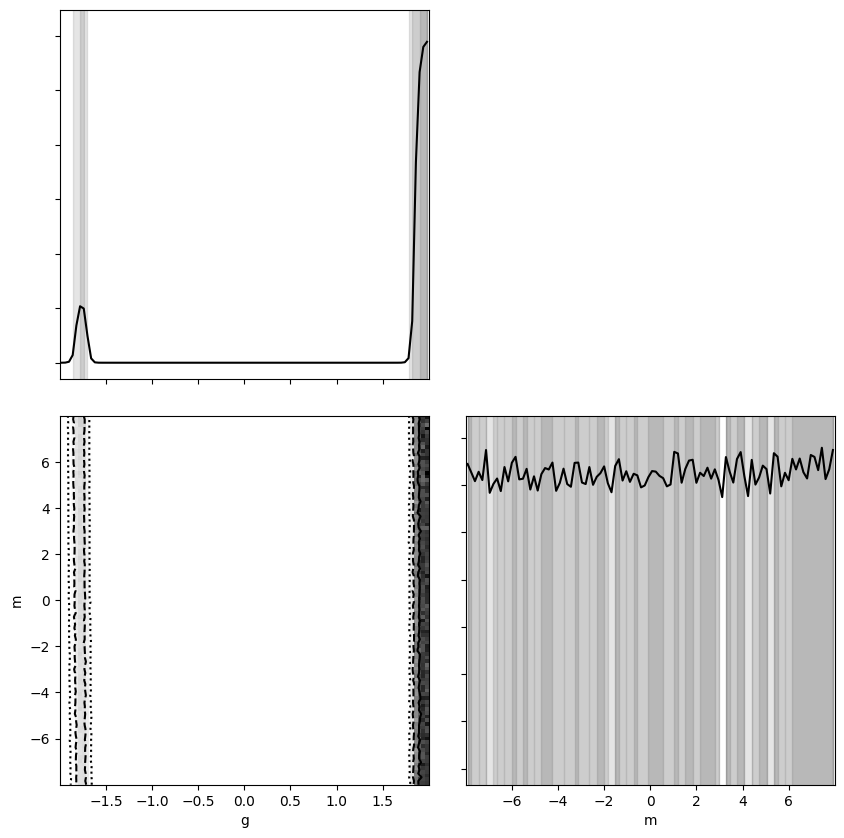

In [151]:
swyft.plot_corner(samples, [0, 1]);
plt.show()